# Project

# Introduction

## Contributions

## Table of Contents

## Dataset

# Setup of Environment

In [35]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd
import datetime as dt

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from scipy import stats

## Extract the data

In [5]:
plant_1_gen = pd.read_csv("Plant_1_Generation_data.csv")
plant_2_gen = pd.read_csv("Plant_2_Generation_data.csv")
plant_1_wea = pd.read_csv("Plant_1_Weather_Sensor_data.csv")
plant_2_wea = pd.read_csv("Plant_2_Weather_Sensor_data.csv")

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

# Data Exploration

## Check columns for missing values


### Plant 1

In [9]:
plant1_info = plant_1_gen.isnull().sum()
print(plant1_info)

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


In [10]:
plant1_wea = plant_1_wea.isnull().sum()
print(plant1_wea)

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


### Plant 2

In [7]:
plant2_info = plant_2_gen.isnull().sum()
print(plant2_info)

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


### Weather 2

In [8]:
plant2_wea = plant_2_wea.isnull().sum()
print(plant2_wea)

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [ ]:
plant1_info = plant_1_gen.isnull().sum()
print(plant1_info)

## How many sensors are at each plant?

In [12]:
print("Plant 1 has",plant_1_gen['SOURCE_KEY'].nunique(),"sensors")
print("Plant 2 has",plant_2_gen['SOURCE_KEY'].nunique(),"sensors")

Plant 1 has 22 sensors
Plant 2 has 22 sensors


In [14]:
#Data for 34 days and continuous dates
numb_daws = pd.to_datetime(plant_1_gen['DATE_TIME']).dt.date.unique()

len(numb_daws) # TODO : check continuity

34

#### Some inverters have more data points then the others

In [ ]:
#Inverterids
print("Plant 1 statistics \n", plant_1_gen.SOURCE_KEY.value_counts())
print("Plant 2 statistics \n", plant_2_gen.SOURCE_KEY.value_counts())

Plant 1 statistics 
 bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ih0vzX44oOqAx2f    3130
ZnxXDlPa8U1GXgE    3130
wCURE6d3bPkepu2    3126
z9Y9gH1T5YWrNuG    3126
iCRJl6heRkivqQ3    3125
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
zVJPv84UY57bAof    3124
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
ZoEaEvLYb1n2sOq    3123
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
1IF53ai7Xc0U56Y    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64
Plant 2 statistics 
 vOuJvMaM2sgwLmb    3259
PeE6FRyGXUgsRhN    3259
WcxssY2VbP4hApt    3259
LlT2YUhhzqhg5Sw    3259
xoJJ8DcxJEcupym    3259
LYwnQax7tkwH5Cb    3259
oZZkBaNadn6DNKz    3259
rrq4fwE8jgrTyWY    3259
9kRcWv60rDACzjR    3259
V94E5Ben1TlhnDV    3259
q49J1IKaHRwDQnt    3259
81aHJ1q11NBPMrL    3259
oZ35aAeoifZaQzV    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6

## Data visualization

### **Convert datetime column to datetime format**

In [15]:
#Plant 1 weather data
plant_1_wea['DATE_TIME'] = pd.to_datetime(plant_1_wea['DATE_TIME']) 
plant_1_wea['TIME'] = plant_1_wea['DATE_TIME'].dt.time 
#convert datetime column to just date
plant_1_wea['DATE'] = pd.to_datetime(plant_1_wea['DATE_TIME'].dt.date)
print(plant_1_wea['DATE'])

#Plant 2 weather data
plant_2_wea['DATE_TIME'] = pd.to_datetime(plant_2_wea['DATE_TIME']) 
plant_2_wea['TIME'] = plant_2_wea['DATE_TIME'].dt.time 
#convert datetime column to just date
plant_2_wea['DATE'] = pd.to_datetime(plant_2_wea['DATE_TIME'].dt.date)


0      2020-05-15
1      2020-05-15
2      2020-05-15
3      2020-05-15
4      2020-05-15
          ...    
3177   2020-06-17
3178   2020-06-17
3179   2020-06-17
3180   2020-06-17
3181   2020-06-17
Name: DATE, Length: 3182, dtype: datetime64[ns]


### **Analysis of weather dataset for both the plants**

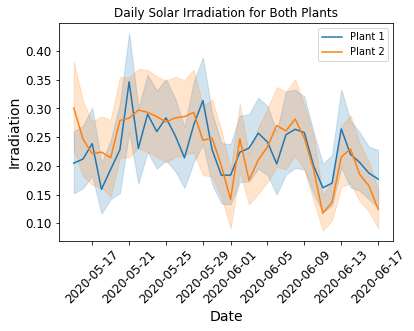

Mean of solar irradition from Plant1 0.22831283006565126
Mean of solar irradition from Plant2 0.23273697972872914


In [22]:
# Comparing both plants
# Daily Irradiation
ambient_compare = sns.lineplot(x='DATE', y='IRRADIATION', data=plant_1_wea, err_style='band', label='Plant 1')
sns.lineplot(x='DATE', y='IRRADIATION', data=plant_2_wea, err_style='band', label='Plant 2', ax=ambient_compare)
plt.ylabel('Irradiation')
plt.xlabel('Date')
plt.title('Daily Solar Irradiation for Both Plants')
plt.xticks(rotation=45)
plt.show()

# The mean of solar Irradiation for both plants are similar
mean_irradiationplant1 = plant_1_wea['IRRADIATION'].mean()
print('Mean of solar irradition from Plant1', mean_irradiationplant1)
mean_irradiationplant2 =  plant_2_wea['IRRADIATION'].mean()
print('Mean of solar irradition from Plant2', mean_irradiationplant2)

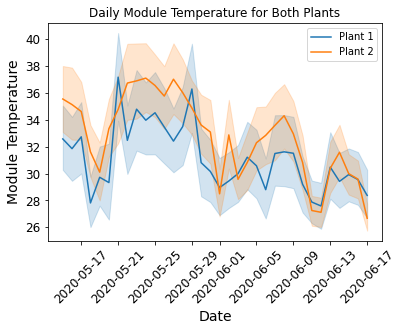

Mean of Module Temperature from Plant1 31.091015378426377
Mean of Module Temperature from Plant2 32.77240792902497


In [23]:
# Daily Module Temperature
modtemp_compare = sns.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant_1_wea, err_style='band', label='Plant 1')
sns.lineplot(x='DATE', y='MODULE_TEMPERATURE', data=plant_2_wea, err_style='band', label='Plant 2', ax=modtemp_compare)
plt.ylabel('Module Temperature')
plt.xlabel('Date')
plt.title('Daily Module Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()

# The mean of Module Temperature for both plants (Plant 1 is lower then Plant 2)
mean_moduletempplant1 = plant_1_wea['MODULE_TEMPERATURE'].mean()
print('Mean of Module Temperature from Plant1', mean_moduletempplant1)
mean_moduletempplant2 =  plant_2_wea['MODULE_TEMPERATURE'].mean()
print('Mean of Module Temperature from Plant2', mean_moduletempplant2)


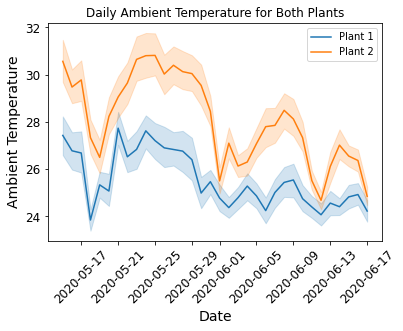

Mean of Ambient Temperature from Plant1 25.53160571756439
Mean of Ambient Temperature from Plant2 28.069399882321143


In [24]:
ambtemp_compare = sns.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant_1_wea, err_style='band', label='Plant 1')
sns.lineplot(x='DATE', y='AMBIENT_TEMPERATURE', data=plant_2_wea, err_style='band', label='Plant 2', ax=ambtemp_compare)
plt.ylabel('Ambient Temperature')
plt.xlabel('Date')
plt.title('Daily Ambient Temperature for Both Plants')
plt.xticks(rotation=45)
plt.show()


# The mean of Ambient Temperature for both plants (Plant 1 is lower then Plant 2)
mean_ambienttempplant1 = plant_1_wea['AMBIENT_TEMPERATURE'].mean()
print('Mean of Ambient Temperature from Plant1', mean_ambienttempplant1)
mean_ambienttempplant2 =  plant_2_wea['AMBIENT_TEMPERATURE'].mean()
print('Mean of Ambient Temperature from Plant2', mean_ambienttempplant2)

#### Observations

1. The mean solar irradiation values for both plants are similar.
2. The mean module temperature of Plant 1 is  lower than Plant 2 most of the time.
3. The mean ambient temperature of Plant 1 is much lower than Plant 2.


## Data cleaning


#### Transform and merge the datasets

In [27]:
# drop unwanted columns. 
df_weather1 = plant_1_wea.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
df_plant1 = plant_1_gen.drop(['PLANT_ID'], axis=1)
df_weather2 = plant_2_wea.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
df_plant2 = plant_2_gen.drop(['PLANT_ID'], axis=1)

In [28]:
#Formatedattime
df_plant1['DATE_TIME']= pd.to_datetime(df_plant1['DATE_TIME'],format='%d-%m-%Y %H:%M')
df_weather1['DATE_TIME']= pd.to_datetime(df_weather1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
#df_plant1.head()
df_plant2['DATE_TIME']= pd.to_datetime(df_plant2['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
df_weather2['DATE_TIME']= pd.to_datetime(df_weather2['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')

In [29]:
df_plant_weather1 = df_plant1.merge(df_weather1, left_on='DATE_TIME', right_on='DATE_TIME')
df_plant_weather2 = df_plant2.merge(df_weather2, left_on='DATE_TIME', right_on='DATE_TIME')

print(df_plant_weather1.head())
print(df_plant_weather2.head())

   DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0   
1 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0   
2 2020-05-15  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6987759.0   
3 2020-05-15  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7602960.0   
4 2020-05-15  McdE0feGgRqW7Ca       0.0       0.0          0.0    7158964.0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION      TIME       DATE  
0            25.184316           22.857507          0.0  00:00:00 2020-05-15  
1            25.184316           22.857507          0.0  00:00:00 2020-05-15  
2            25.184316           22.857507          0.0  00:00:00 2020-05-15  
3            25.184316           22.857507          0.0  00:00:00 2020-05-15  
4            25.184316           22.857507          0.0  00:00:00 2020-05-15  
   DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  

### Imputation

## Data Analysis

### **Data Correlation Analysis**


Observations:
1. High correlation between DC Power and AC power generation
2. High correlation between DC Power and IRRADIATION
3. Strong correlation between DC Power, AC Power and Module Temperature and Ambient Temperature

In [30]:
corr_matrix = df_plant_weather1.corr()

corr_matrix["DC_POWER"].sort_values(ascending=False)

DC_POWER               1.000000
AC_POWER               0.999996
IRRADIATION            0.989391
MODULE_TEMPERATURE     0.954811
AMBIENT_TEMPERATURE    0.724668
DAILY_YIELD            0.082243
TOTAL_YIELD            0.003851
Name: DC_POWER, dtype: float64

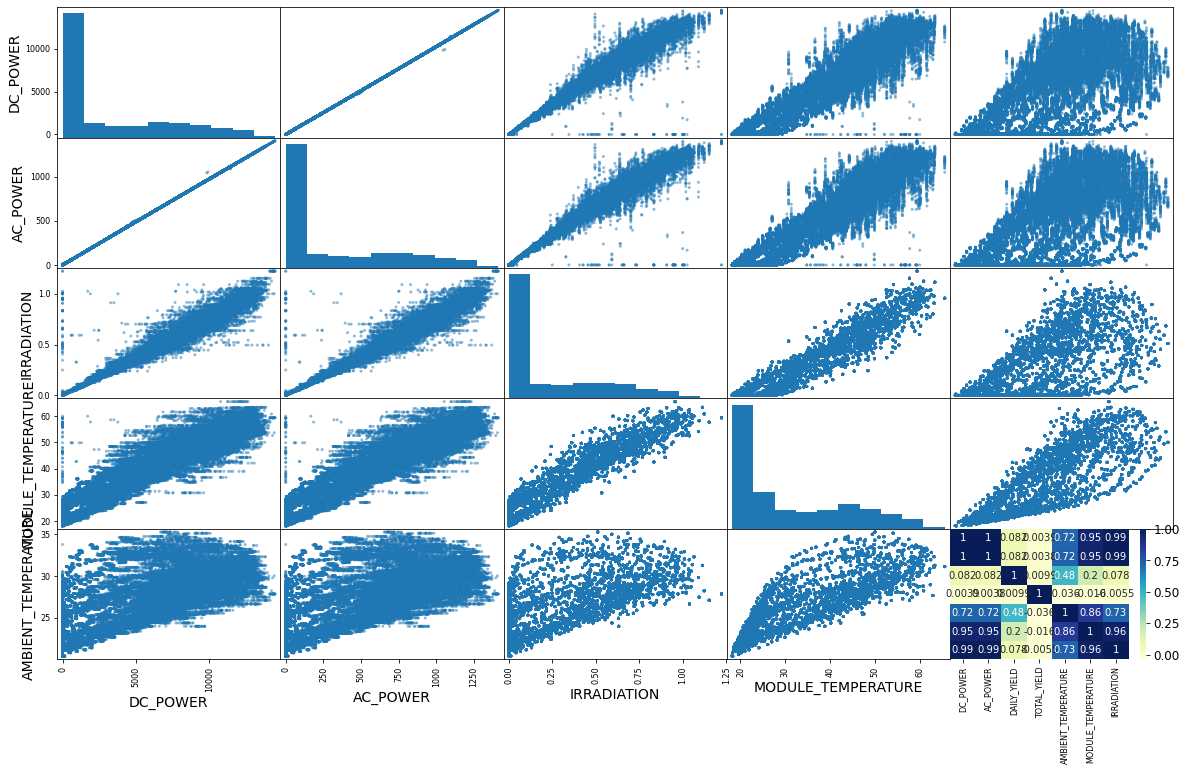

In [41]:
attributes = ["DC_POWER", "AC_POWER", "IRRADIATION",
              "MODULE_TEMPERATURE","AMBIENT_TEMPERATURE"]
scatter_matrix(df_plant_weather1[attributes], figsize=(20, 12))
fig_corr = sns.heatmap(corr_matrix,cmap="YlGnBu", annot=True) # TODO - subplot + margin
plt.show(plt.margins(1))

**Analysis of DC power generated from each Source Keys.**
1. TheDistribution DC power generation plot shows multiple occasion where power generated was zero during daytime.
2.  plot of solar irradiation exhibits that the solar radiation never dropped to a lower value at day time. 
3. Analysis shows some inverters received no DC power even through there was enough sunlight
4. It could be concluded that the DC power generated and solar irradiation has a linear relationship.

### **Stacked Visualization of Power Generation**

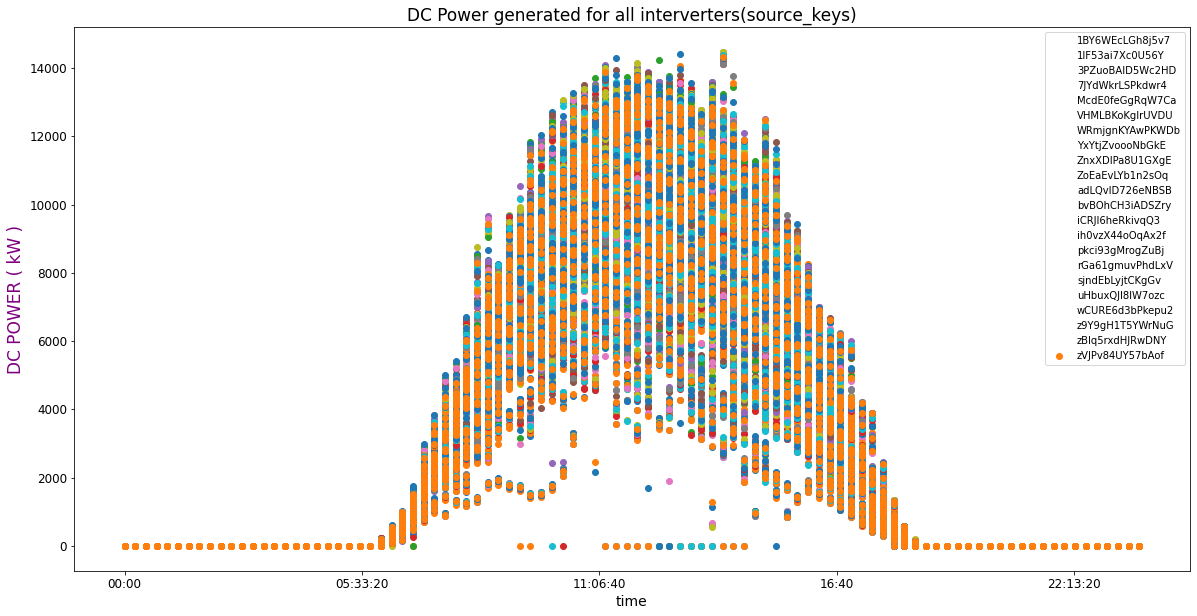

In [42]:
#DC power generated from each source keys
sources=df_plant_weather1.copy()
sources['time']=sources['DATE_TIME'].dt.time
sources.set_index('time').groupby('SOURCE_KEY')['DC_POWER'].plot(style='o',legend=True,figsize=(20,10))
plt.title('DC Power generated for all interverters(source_keys)',size=17)
plt.ylabel('DC POWER ( kW )',color='purple',fontsize=17)
plt.show()

In [45]:
#Inverters with lower performace then rest "1BY6WEcLGh8j5v7", "bvBOhCH3iADSZry"
SOURCE = df_plant_weather1.groupby('SOURCE_KEY').agg({'DC_POWER': ['mean', 'min', 'max','median']})
sources_mean = df_plant_weather1.groupby.agg({'DC_POWER': ['mean', "std"]})
print(sources_mean)

         DC_POWER
mean  3147.177450
std   4036.441826


## Research

### Select features of interest / Problem Statement

### Choose an appropriate ML model based on the dataset and your problem statement.

# ML Stuff


Tune the parameters of your model. 
Make predictions regarding the future values for some of your chosen variables. 

 Evaluate your model based on different metrics. 

 - R2, 
 - MSE,
 - RSME,
 - Cross validation

# References